<a href="https://colab.research.google.com/github/Noahkandie/Mchezopesa-Ltd-Regression-Analysis/blob/main/Mchezo_Pesa_Ltd_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Introduction**

#### **Overview**


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)
Approach 1: Polynomial approach

What to train given:

    - Rank of home team
    - Rank of away team
    - Tournament type
**bold text**
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.
Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### **Research Question**

Given the rank of the home team, the rank of the away team, and the rank of the tournament type, predict:

    how many goals the home team scores
    how many goals the away team scores

Also, from the home team's perspective, use feature engineering to determine if the game is a Win, Lose, or Draw (W, L, or D)

###  **Metric for Success**

The model will be considered a success when it is able to correctly and accurately predict the respective scores, and determine whether the game is a win, lose, or draw. 
We are setting the minimum accuracy level to be 80% because it seems a good target score for accuracy.

### **Experimental Design**

We will carry out the following procedure to solve the research question:

- load, merge, prepare, and clean the datasets
- perform exploratory data analysis
- perform polynomial and logistic regression
- build the models and cross-validate them
- interpret results obtained and use them to make conclusions
- challenge my working


For the Polynomial Regression part, we intend to do the following:

    Carry out feature engineering, where applicable
    Check for multicollinearity
    Build an optimal model
    Cross validate the model
    Compute and interpret the RMSE
    Assess the heteroscedasticity

For Logistic Regression, we will carry out the following:

    Feature engineering, where necessary
    Train an optimal classifier
    Interpret the results
    Make a suitable prediction


### Data Relevance

The data that was used for survey was obtained from an open datasource. this data is an aggregation by day of the number of goals scored and rankings of countries in the men's FIFA team. with it is a model that determines which team gets to be ranked where and how according to the years and goals

## 2. Data Understanding

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt


### Load Data and preview

In [2]:
# Load the datasets and preview the data

# Ranking dataset
ranking=pd.read_csv('fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
ranking.info()
# The dataset has 57756 rows and 16 columns
# We can also check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [5]:
# Result dataset 
results=pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
results.info()

# The dataset has 40839 rows and 9 columns
# We can also check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## 3. Data Cleaning and Manipulation

 Ranking

In [8]:
print('Team Ranking columns=: ', ranking.columns)

Team Ranking columns=:  Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')


In [9]:
# Drop unneeded columns
ranking1=ranking[['country_full','rank','rank_date']]
ranking1.sample(5)

,country_full,rank,rank_date
33681,Antigua and Barbuda,133,2008-10-08
21652,Bulgaria,39,2003-11-19
13799,Uganda,114,2000-07-05
3157,Zaire,56,1995-06-13
7355,Netherlands,4,1997-09-17


In [10]:
# Change Date datatype for both datasets and create year column
import datetime
ranking1['rank_date'] = pd.to_datetime(ranking1['rank_date'])
results['date'] = pd.to_datetime(results['date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# create 'year' column
ranking1['year'] = ranking1['rank_date'].dt.year
results['year'] = results['date'].dt.year
ranking1.sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_full,rank,rank_date,year
2333,Bangladesh,127,1994-11-22,1994
12616,Ethiopia,143,2000-01-19,2000
666,Bahamas,167,1993-11-19,1993


In [12]:
# Max and min Date
print('max date: ',ranking1['rank_date'].max())
print('min date: ',ranking1['rank_date'].min())

max date:  2018-06-07 00:00:00
min date:  1993-08-08 00:00:00


In [13]:
# Get the limits of the needed 
ranking1=ranking1[(ranking1['rank_date']>'1993-08-08') & (ranking['rank_date']<'2018-06-07')]


In [14]:
# Standardize the result dataset
results=results[(results['date']>'1993-08-08') & (results['date']<'2018-06-07')]


In [15]:
# Because ranking is done in the mid year, we aggregate the mean rank per year so we can have a singular rank value per year.
# Using general knowledge, most countries move a few position in ranking, so the aggregation can be a good indicator of the rank 

ranking1 = ranking1.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean'})
ranking1.head()

,year,country_full,rank
0,1993,Albania,91.75
1,1993,Algeria,32.25
2,1993,Angola,98.50
3,1993,Antigua and Barbuda,125.50
4,1993,Argentina,9.50


In [16]:
# Checking Null values and removing missing values if any
ranking1.isnull().sum()


year            0
country_full    0
rank            0
dtype: int64

In [17]:
# Check for duplicates
ranking.duplicated()
ranking.drop_duplicates(inplace=True)
ranking.duplicated().value_counts()

False    57756
dtype: int64

 Results 

In [18]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21898 entries, 17922 to 39819
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        21898 non-null  datetime64[ns]
 1   home_team   21898 non-null  object        
 2   away_team   21898 non-null  object        
 3   home_score  21898 non-null  int64         
 4   away_score  21898 non-null  int64         
 5   tournament  21898 non-null  object        
 6   city        21898 non-null  object        
 7   country     21898 non-null  object        
 8   neutral     21898 non-null  bool          
 9   year        21898 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 1.7+ MB


In [19]:
# Drop unnecessary columns
results=results.drop(columns=['city','country'])

In [20]:
#Creating a new column 'Status' 
def f(row):
    if row['home_score'] == row['away_score']:
        value = 'Draw'
    elif row['home_score'] < row['away_score']:
        value = 'Loss'
    else:
        value = 'Win'
    return value

results['outcome'] = results.apply(f, axis=1)

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,outcome
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,False,1993,Win
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,False,1993,Loss
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,False,1993,Loss


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


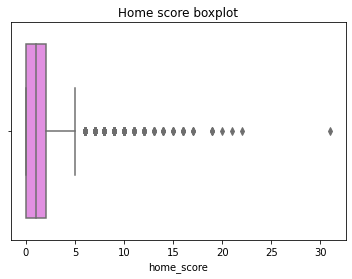

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


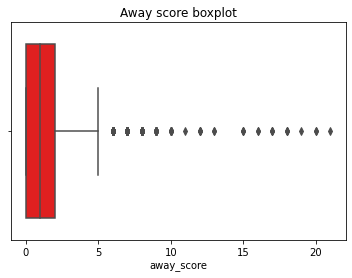

In [21]:
# Check for outliers 
# Home scores
sns.boxplot(results['home_score'],color='violet')
plt.title('Home score boxplot')
plt.show()
# Away scores
sns.boxplot(results['away_score'],color='red')
plt.title('Away score boxplot')
plt.show()


In [22]:
# remove outliers using IQR method

Q3 = results[['away_score','home_score']].quantile(0.75)
Q1 = results[['away_score','home_score']].quantile(0.25)
IQR = Q3 - Q1

IQR


results[['away_score','home_score']] = results[['away_score','home_score']][~((results[['away_score','home_score']] < (Q1 - 1.5 * IQR)) |(results[['away_score','home_score']] > (Q3 + 1.5 * IQR))).any(axis=1)]
results[['away_score','home_score']].shape

(21898, 2)

In [23]:
# Check for null values
results.isnull().sum()
results.dropna(axis=0,inplace=True)

In [24]:
# Duplicates
results.duplicated().value_counts()

False    20990
dtype: int64

In [25]:
#Ensuring that country names appear similarly in both datasets
results =  results.replace({'Germany DR': 'Germany'})
ranking1= ranking1.replace({"IR Iran": "Iran"})

Merging the datasets 

In [26]:
# Merging on the hometeam and country and on matchday
dataset = results.merge(ranking1, left_on = ['year', 'home_team'],
                        right_on = ['year', 'country_full'], how = 'inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18761 entries, 0 to 18760
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18761 non-null  datetime64[ns]
 1   home_team     18761 non-null  object        
 2   away_team     18761 non-null  object        
 3   home_score    18761 non-null  float64       
 4   away_score    18761 non-null  float64       
 5   tournament    18761 non-null  object        
 6   neutral       18761 non-null  bool          
 7   year          18761 non-null  int64         
 8   outcome       18761 non-null  object        
 9   country_full  18761 non-null  object        
 10  rank          18761 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [27]:
# now to get the rank of the away team on the day of the match
dataset = dataset.merge(ranking1, left_on = ['year', 'away_team'],
                        right_on = ['year', 'country_full'], how = 'inner')

dataset.sample(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,outcome,country_full_x,rank_x,country_full_y,rank_y
13211,2012-06-11,France,England,1.0,1.0,UEFA Euro,True,2012,Draw,France,15.416667,England,5.250000
10818,2009-10-10,Estonia,Bosnia and Herzegovina,0.0,2.0,FIFA World Cup qualification,False,2009,Loss,Estonia,112.666667,Bosnia and Herzegovina,47.166667


In [28]:
print(dataset.shape)
dataset.columns

(17176, 13)


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'outcome', 'country_full_x', 'rank_x',
       'country_full_y', 'rank_y'],
      dtype='object')

In [29]:
# Drop columns
df=dataset.drop(columns=['country_full_y','country_full_x','year',])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,outcome,rank_x,rank_y
0,1993-08-09,Guinea,Sierra Leone,4.0,0.0,Friendly,False,Win,62.00,80.5
1,1993-11-28,Guinea,Gambia,1.0,2.0,Amílcar Cabral Cup,True,Loss,62.00,145.5
2,1993-11-30,Sierra Leone,Gambia,1.0,1.0,Amílcar Cabral Cup,False,Draw,80.50,145.5
3,1993-08-11,Sweden,Switzerland,1.0,2.0,Friendly,False,Loss,9.75,11.0
4,1993-09-08,Scotland,Switzerland,1.0,1.0,FIFA World Cup qualification,False,Draw,26.50,11.0


In [30]:
# Changing column names
df.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     }, 
                 inplace=True)
 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,outcome,home_team_rank,away_team_rank
0,1993-08-09,Guinea,Sierra Leone,4.0,0.0,Friendly,False,Win,62.00,80.5
1,1993-11-28,Guinea,Gambia,1.0,2.0,Amílcar Cabral Cup,True,Loss,62.00,145.5
2,1993-11-30,Sierra Leone,Gambia,1.0,1.0,Amílcar Cabral Cup,False,Draw,80.50,145.5
3,1993-08-11,Sweden,Switzerland,1.0,2.0,Friendly,False,Loss,9.75,11.0
4,1993-09-08,Scotland,Switzerland,1.0,1.0,FIFA World Cup qualification,False,Draw,26.50,11.0


In [31]:
# Check for duplicates
df[df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,neutral,outcome,home_team_rank,away_team_rank


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 0 to 17175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17176 non-null  datetime64[ns]
 1   home_team       17176 non-null  object        
 2   away_team       17176 non-null  object        
 3   home_score      17176 non-null  float64       
 4   away_score      17176 non-null  float64       
 5   tournament      17176 non-null  object        
 6   neutral         17176 non-null  bool          
 7   outcome         17176 non-null  object        
 8   home_team_rank  17176 non-null  float64       
 9   away_team_rank  17176 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(4)
memory usage: 1.3+ MB


## 4. Exploratory Data Analysis

In [33]:
# Statistical description of the data
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,date,home_team,away_team,home_score,away_score,tournament,neutral,outcome,home_team_rank,away_team_rank
count,17176,17176,17176,17176.000000,17176.000000,17176,17176,17176,17176.000000,17176.000000
unique,4678,194,194,NaN,NaN,65,2,3,NaN,NaN
top,2012-02-29 00:00:00,Mexico,Zambia,NaN,NaN,Friendly,False,Win,NaN,NaN
freq,56,253,198,NaN,NaN,6608,13018,8169,NaN,NaN
first,1993-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.465766,1.024569,NaN,NaN,NaN,74.509537,76.689142
std,NaN,NaN,NaN,1.281054,1.102535,NaN,NaN,NaN,49.569762,50.333277
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,32.636364,34.250000


False    13018
True      4158
Name: neutral, dtype: int64


Text(0.5, 1.0, 'Did the match occur at a neutral location?')

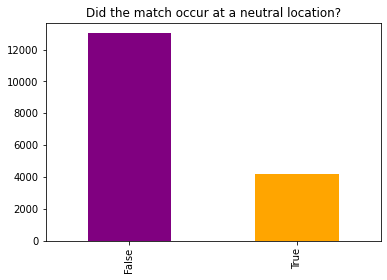

In [34]:
# Distribution of the venue of the match
venue=df['neutral'].value_counts()
print(venue)
venue.plot(kind='bar',color = ( 'purple','orange'),)
plt.title('Did the match occur at a neutral location?')

Win     8169
Loss    4718
Draw    4289
Name: outcome, dtype: int64


Text(0.5, 1.0, 'Match outcome per home team')

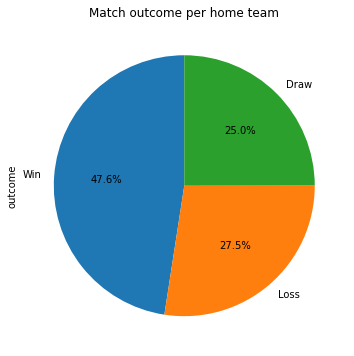

In [35]:
# Match outcome as per the home team perspective
outcome=df['outcome'].value_counts()
print(outcome)
outcome.plot(kind='pie',autopct = '%0.1f%%', figsize = [8, 6],startangle=90)

plt.title('Match outcome per home team')

Friendly                                6608
FIFA World Cup qualification            3898
UEFA Euro qualification                 1352
African Cup of Nations qualification     879
AFC Asian Cup qualification              387
FIFA World Cup                           308
African Cup of Nations                   303
CECAFA Cup                               303
COSAFA Cup                               226
Copa América                             217
UEFA Euro                                202
African Nations Championship             185
AFF Championship                         168
CFU Caribbean Cup qualification          167
Gold Cup                                 165
Name: tournament, dtype: int64


Text(0.5, 0, 'Frequency')

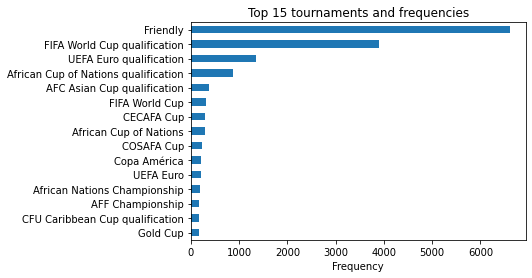

In [36]:
# Tournament Frequencies
tournament=df['tournament'].value_counts()
print(tournament[:15,])
tournament[:15,].sort_values().plot(kind = 'barh')
plt.title('Top 15 tournaments and frequencies')
plt.xlabel('Frequency')

Since most cups, tournaments, championships etc are competitive matches, we group into friendly and competitive matches.
We assume a team can field a weaker team in the frendlies but a strong one in competitive matches hence can affect results

Competitive    10568
Friendly        6608
Name: tournament, dtype: int64


Text(0, 0.5, 'Frequency')

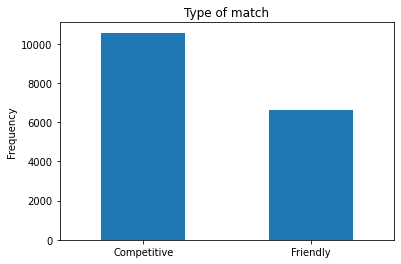

In [37]:
# Check match type and frequency
df.loc[df.tournament != 'Friendly', 'tournament'] = 'Competitive'
print(df['tournament'].value_counts())
df['tournament'].value_counts().plot(kind='bar',rot=0)
plt.title('Type of match')
plt.ylabel('Frequency')

In [38]:
df.corr()

,home_score,away_score,neutral,home_team_rank,away_team_rank
home_score,1.000000,-0.125713,-0.048241,-0.164592,0.267656
away_score,-0.125713,1.000000,0.072101,0.185617,-0.191566
neutral,-0.048241,0.072101,1.000000,0.003780,0.026749
home_team_rank,-0.164592,0.185617,0.003780,1.000000,0.490224
away_team_rank,0.267656,-0.191566,0.026749,0.490224,1.000000


### Feature Engineering


We have already created a match outcome column, which records whether a match was a win, draw or loss from the home teams perspective

We change the column types and encode them

In [39]:
df['tournament'] = df['tournament'].astype('category')
df['outcome'] = df['outcome'].astype('category')
df['neutral'] = df['neutral'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 0 to 17175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17176 non-null  datetime64[ns]
 1   home_team       17176 non-null  object        
 2   away_team       17176 non-null  object        
 3   home_score      17176 non-null  float64       
 4   away_score      17176 non-null  float64       
 5   tournament      17176 non-null  category      
 6   neutral         17176 non-null  category      
 7   outcome         17176 non-null  category      
 8   home_team_rank  17176 non-null  float64       
 9   away_team_rank  17176 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(4), object(2)
memory usage: 1.1+ MB


Label encoding

In [40]:
df['tournament'].value_counts()

Competitive    10568
Friendly        6608
Name: tournament, dtype: int64

In [41]:
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
  
 
df['outcome']= label_encoder.fit_transform(df['outcome'])
df['neutral']= label_encoder.fit_transform(df['neutral'])
df['tournament']=label_encoder.fit_transform(df['tournament'])
df.tail()

# Where outcome = 2:win, 1: lose, 0:Draw
# Where neutral = 0: False, 1:True
# Where tournament = 0: Competitive matches, 1: Friendlies

,date,home_team,away_team,home_score,away_score,tournament,neutral,outcome,home_team_rank,away_team_rank
17171,2018-06-03,Costa Rica,Northern Ireland,3.0,0.0,1,0,2,25.6,25.8
17172,2018-06-01,India,Chinese Taipei,5.0,0.0,0,0,2,99.4,128.8
17173,2018-06-02,El Salvador,Honduras,1.0,0.0,1,1,2,87.2,62.8
17174,2018-06-05,Kazakhstan,Azerbaijan,3.0,0.0,1,0,2,128.6,123.2
17175,2018-06-06,Belarus,Hungary,1.0,1.0,1,0,0,87.4,50.4


Check for Multicollinearity

In [42]:
# We find the correlation
corr=df.corr()
corr

,home_score,away_score,tournament,neutral,outcome,home_team_rank,away_team_rank
home_score,1.000000,-0.125713,-0.018943,-0.048241,0.561551,-0.164592,0.267656
away_score,-0.125713,1.000000,-0.021855,0.072101,-0.251279,0.185617,-0.191566
tournament,-0.018943,-0.021855,1.000000,-0.109422,-0.036101,-0.086949,-0.074293
neutral,-0.048241,0.072101,-0.109422,1.000000,-0.043579,0.003780,0.026749
outcome,0.561551,-0.251279,-0.036101,-0.043579,1.000000,-0.118558,0.199449
home_team_rank,-0.164592,0.185617,-0.086949,0.003780,-0.118558,1.000000,0.490224
away_team_rank,0.267656,-0.191566,-0.074293,0.026749,0.199449,0.490224,1.000000


<Figure size 720x288 with 0 Axes>

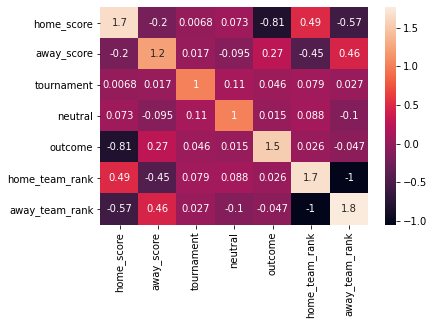

<Figure size 720x288 with 0 Axes>

In [43]:
# We calculate Variance Inflation Factor (VIF)
vif=pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

# plot VIF heatmap
sns.heatmap(vif,annot=True)
plt.figure(figsize = (10,4),)

## 5. Regression Analysis

### a) Polynomial Regression


Question
What to train given:

1. Rank of home team
2. Rank of away team
3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

#### i) Model 1: Predicting goals scored by home team

In [44]:
df[['home_score','away_score','home_team_rank','away_team_rank','tournament']].describe()

,home_score,away_score,home_team_rank,away_team_rank,tournament
count,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000
mean,1.465766,1.024569,74.509537,76.689142,0.384723
std,1.281054,1.102535,49.569762,50.333277,0.486544
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,32.636364,34.250000,0.000000
50%,1.000000,1.000000,68.625000,70.350000,0.000000
75%,2.000000,2.000000,108.916667,111.616667,1.000000
max,5.000000,5.000000,207.916667,207.000000,1.000000


In [45]:
# Get our dependent and independent variables
X1=df[['home_team_rank','away_team_rank','tournament']].values
y1=df['home_score'].values

print(X1.shape)
print(y1.shape)



(17176, 3)
(17176,)


In [46]:
# Splitting the dataset to get the train and test sets
X1_train, y1_train, X1_test, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)



In [47]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X1,y1)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 5) 
X_poly = poly_reg.fit_transform(X1)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)


pol_reg.predict(poly_reg.fit_transform([[93,2,0]]))

array([0.58877021])

In [76]:
# Hometeam rank,away rank, tournament examples
# (1,83,0),(93,2,0),(60,57,1)
print(pol_reg.predict(poly_reg.fit_transform([[1,83,0]])))
print(pol_reg.predict(poly_reg.fit_transform([[93,2,0]])))
print(pol_reg.predict(poly_reg.fit_transform([[60,57,1]])))

[0.44123065]
[2.07289805]
[1.00339925]


We can see a higher ranked team playing a lower ranked home team will surely score more goals than the lower ranked home team playing against a higher ranked team

Cross- Validation Model 1

Using KFold

In [50]:
X1=df[['home_team_rank','away_team_rank','tournament']].values
y1=df['home_score'].values
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X1)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X1):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X1_train, X1_test = X1[train_index], X1[test_index]
  y1_train, y1_test = y1[train_index], y1[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
np.mean(RMSES)

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1740133398565835

Training model 2
Model 2 Root Mean Squared Error: 1.1835818070777766

Training model 3
Model 3 Root Mean Squared Error: 1.1240950172330275

Training model 4
Model 4 Root Mean Squared Error: 1.1647993729222994

Training model 5
Model 5 Root Mean Squared Error: 1.1322138160558528


1.155740670629108

In [51]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()
X1=df[['home_team_rank','away_team_rank','tournament']].values
y1=df['home_score'].values
# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X1)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 
for train_index, test_index in folds.split(X1):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X1_train, X1_test = X1[train_index], X1[test_index]
  y1_train, y1_test = y1[train_index], y1[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 17176 folds
trained 17176 models


0.9273483751194713

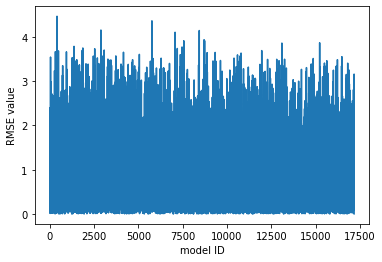

In [52]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Heteroskedasticity
Check for residuals

In [53]:
X1=df[['home_team_rank','away_team_rank','tournament']]
y1=df['home_score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

# This is our prediction for admission based on our model
y1_predict = regressor.predict(X1_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals1 = np.subtract(y1_predict, y1_test)

# Let's describe our residual:
pd.DataFrame(residuals1).describe()

residuals1.mean()

0.012836114954297095

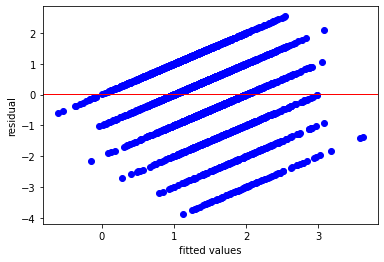

In [54]:
plt.scatter(y1_predict, residuals1, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals1.mean(), color='red', linewidth=1)
plt.show()

Bartlett's test

In [55]:
test_result, p_value = sp.stats.bartlett(y1_predict, residuals1)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y1_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


*Observation*

The KFold model has a mean RMSES of 1.1557  and the model with lowest RMSES is Model 3 while model 2 has the largest RMSES value

Using  the Leave One Out Cross validations gives a RMSES value of 0.927.
This model gives us a sense of how  best we can expect a given model to be using our dataset

The Variances are homogenous. This is seen by the residual mean value of 0.012836

The residual plot has a parallel pattern which is a logical consequence of the fact that that the dependent variable has only a few possible values.


#### ii) Model 2: Predicting goals scored by away team

Modelling

In [56]:
# Get our dependent and independent variables
X2=df[['home_team_rank','away_team_rank','tournament']].values
y2=df['away_score'].values

print(X2.shape)
print(y2.shape)

# Splitting the dataset to get the train and test sets
X2_train, y2_train, X2_test, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state=0)

# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X2,y2)

# Fit polynomial Regression to the dataset
poly_reg2 = PolynomialFeatures(degree = 5) 
X2_poly = poly_reg2.fit_transform(X2)

pol_reg = LinearRegression()
pol_reg.fit(X2_poly, y2)

pol_reg.predict(poly_reg.fit_transform([[1,150,0]]))

(17176, 3)
(17176,)


array([0.22873695])

In [77]:
# Hometeam rank,away rank, tournament examples
# (1,83,0),(93,2,0),(60,57,1)

print(pol_reg.predict(poly_reg.fit_transform([[1,83,0]])))
print(pol_reg.predict(poly_reg.fit_transform([[93,2,0]])))
print(pol_reg.predict(poly_reg.fit_transform([[60,57,1]])))

[0.44123065]
[2.07289805]
[1.00339925]


Cross- Validation 2 (Away Scores)

In [57]:
X2=df[['home_team_rank','away_team_rank','tournament']].values
y2=df['away_score'].values
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X2)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X2):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X2_train, X2_test = X2[train_index], X2[test_index]
  y2_train, y2_test = y2[train_index], y2[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X2_train, y2_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X2_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y2_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

np.mean(RMSES)

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0268926951494324

Training model 2
Model 2 Root Mean Squared Error: 1.051516562913681

Training model 3
Model 3 Root Mean Squared Error: 1.0143601225432184

Training model 4
Model 4 Root Mean Squared Error: 1.0017916822075554

Training model 5
Model 5 Root Mean Squared Error: 1.0184354993415399


1.0225993124310855

In [58]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()
X1=df[['home_team_rank','away_team_rank','tournament']].values
y1=df['away_score'].values
# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X1)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X1):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X1_train, X1_test = X1[train_index], X1[test_index]
  y1_train, y1_test = y1[train_index], y1[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 17176 folds
trained 17176 models


0.8031170948270177

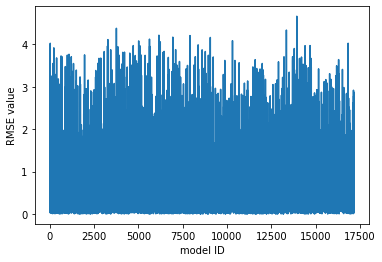

In [59]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Heteroskedasticity test and residual plots

In [60]:
X2=df[['home_team_rank','away_team_rank','tournament']]
y2=df['away_score']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

# This is our prediction for admission based on our model
y2_predict = regressor.predict(X2_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y2_predict, y2_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.0005445130527768274

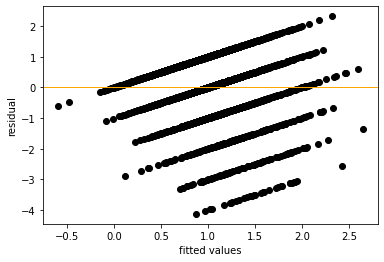

In [61]:
# Residual plots
plt.scatter(y2_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange', linewidth=1)
plt.show()

Bartlett's Test

In [62]:
test_result, p_value = sp.stats.bartlett(y2_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y2_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


The KFold cross validation model has a mean RMSES of 1.023  and the model with lowest RMSES is Model 3 while model 2 has the largest RMSES value

Using  the Leave One Out Cross validations gives a RMSES value of 0.803.
This model gives us a sense of how  best we can expect a given model to be using our dataset

The Variances are homogenous. This is seen by the residual mean value of -0.0005

### b) Logistic Regression

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

Feature Engineering has already been done. The match outcome is

In [63]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'outcome', 'home_team_rank', 'away_team_rank'],
      dtype='object')

In [64]:
df_outcome=df[['home_score', 'away_score','outcome']]

In [65]:
X=df_outcome[['home_score', 'away_score']]
y=df_outcome.outcome

print ('Shape of X: ',X.shape,' Shape of y: ',y.shape)


Shape of X:  (17176, 2)  Shape of y:  (17176,)


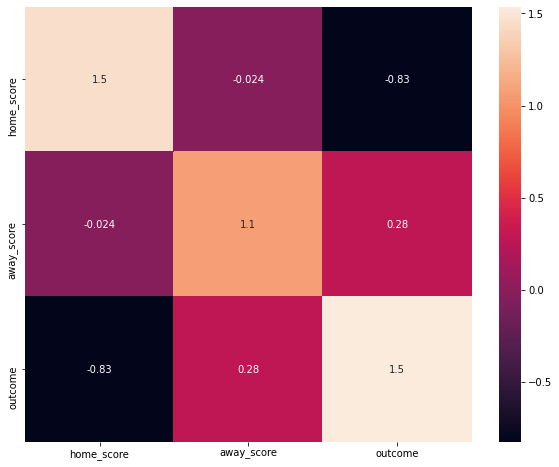

In [66]:
# check for multicollinearity between the variables
wld_vif = pd.DataFrame(np.linalg.inv(df_outcome.corr().values), index = df_outcome.corr().index,columns = df_outcome.corr().columns)

plt.figure(figsize = (10,8))
sns.heatmap(wld_vif, annot = True)



All VIF values that are below 5, so we can continue with analyses

In [67]:
# Split our dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [68]:
#Fit our model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [69]:
y.value_counts()

2    8169
1    4718
0    4289
Name: outcome, dtype: int64

In [70]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 868,    0,    0],
       [   0,  937,    0],
       [   0,    0, 1631]])

Making predictions

Using KNN

In [71]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
# Using the examples to check the prediction
# Where 2:win, 1: lose, 0:Draw
ex_1=np.array([[1,3]])
ex_2=np.array([[0,0]])

prediction1 = knn.predict(ex_1)
print("Result of prediction:", prediction1)
prediction2 = knn.predict(ex_2)
print("Result of prediction:", prediction2)

Result of prediction: [1]
Result of prediction: [0]


In [73]:
# Test the accuracy of the model
prediction_score = knn.score(X_test, y_test)
prediction_score

0.9997089639115251

From this, we see that our model is accurate approximately 99.97% of the time. While accuracy alone is not sufficient to conclude whether the model is actually good or not, we say it's a really good option to settle with for the time being until a better model can be made

Cross-Validating the Model

In [74]:
score = cross_val_score(LogisticRegression(solver='liblinear', multi_class = 'auto'), X, y, cv = 3)
score

array([0.99982536, 1.        , 1.        ])

In [75]:
# assessing the accuracy of our model
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 1.00 (+/- 0.00)


The model is very accurate at predicting whether the match will be a win, loss, or draw given the home and away scores.

## 6. Conclusion

In conclusion, we see that tournament type, home rank, and away rank do not really influence the home or away scores by a large margin. We can assume this is because the goals scored or conceded are of few possible values

We managed to correctly predict home or away goal scored.

The Logistic regression model performed really well and with ~ 100% accuracy.
This means we can accurately predict the match outcome given the goals scored by both away and home teams.

## 7. Challenging the Solution

Also, the data sets need to be more completed and less biased(missiing point values upto 2011) so that there is not so much loss of data when merging the two datasets
We should also try to figure out a way to extensively explore the relationship between ranks and scores and split the data according to regions (e.g. country or continent) and/or confederations, and see if there's an influence on ranking and scores.